In [1]:
# import libraries
# data manupulatin
import pandas as pd
import numpy as np
# visulization
import matplotlib
import matplotlib.pyplot as plt
# plot settings
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.linewidth'] = 2.0
# set max row to 300
pd.set_option('display.max_rows', 300)

In [2]:
# define an array
v = np.arange(1,10)
v

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# scalar multiplication
2*v

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [4]:
# user-defined function
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # set the seed for reproducibility
    np.random.seed(10000)
    
    # read the parameters
    S0 = s0                # initial spot level
    r = mu                 # mu=rf in risk neutral framework 
    T = horizon            # time horizon
    t = timesteps          # number of time steps
    n = n_sims             # number of simulations
    
    # define dt
    dt = T/t               # length of time interval
    
    # simulate n asset price price with t timesteps
    S = np.zeros((t,n))
    S[0] = S0
    
    for i in range(0,t-1):
        w = np.random.standard_normal(n)
        S[i+1] = S[i] * (1+ r*dt + sigma * np.sqrt(dt) * w)
    
    return S

In [5]:
# verify the shape of S
spath = simulate_path(100, 0.05, 0.2, 1, 252, 100000)
spath.shape

(252, 100000)

In [6]:
# check w (brownian motion)
np.random.seed(10000)
w_sn = np.random.standard_normal(100000)
w_sn.shape, w_sn.mean(), w_sn.std()

((100000,), 0.0015478685920003361, 0.9999493876956002)

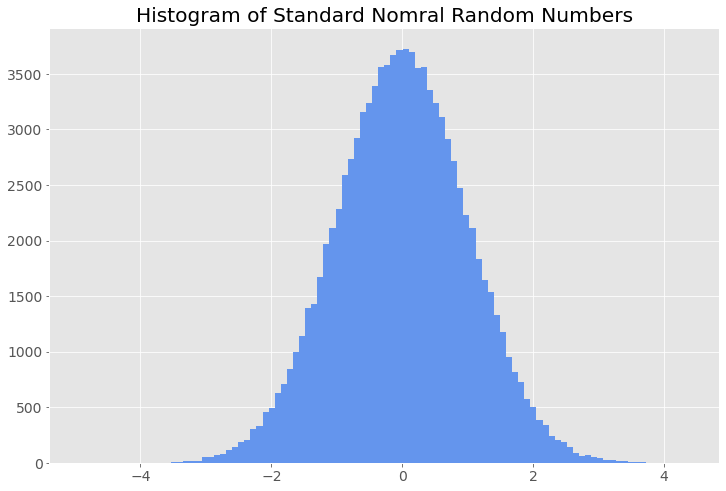

In [7]:
# plot the histogram of the psuedo random numbers
plt.hist(pd.DataFrame(np.random.standard_normal(100000)), bins=100, color='cornflowerblue')
plt.title('Histogram of Standard Nomral Random Numbers');

In [8]:
# assign simulated price path to dataframe
price_path = pd.DataFrame(simulate_path(100, 0.05, 0.2, 1, 252, 100000))
price_path.tail()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
247,120.852871,73.800799,131.972756,85.146340,96.647391,145.306903,80.835849,116.699543,146.524625,92.837926,...,117.125200,98.044673,77.214600,126.943783,66.673986,102.493780,100.521832,107.610387,114.884035,88.209320
248,122.527621,73.744449,130.293612,85.286610,97.907263,144.821862,80.365324,115.746006,146.042448,92.667492,...,115.599845,97.862926,78.233842,125.844117,66.377655,101.677147,98.078113,106.814941,116.481455,88.013134
249,123.271121,75.682955,129.660079,83.921614,98.727483,145.548026,79.898918,115.616426,143.093503,93.073108,...,114.147618,98.887153,78.422099,123.627125,67.280394,103.011064,97.251055,107.642559,117.115391,88.060111
250,120.191906,74.536892,129.869937,83.268608,99.416004,145.089888,79.993577,115.108866,145.587400,94.805701,...,113.254915,100.110953,79.943853,123.433024,67.710034,102.352844,97.816085,105.761352,119.361116,90.104125
251,120.814872,74.275841,130.515406,82.686641,97.362695,142.820721,80.835690,112.092138,147.169900,95.467139,...,112.841938,99.666244,80.744836,122.955212,67.126030,102.426291,98.879244,107.860361,119.470899,86.796022


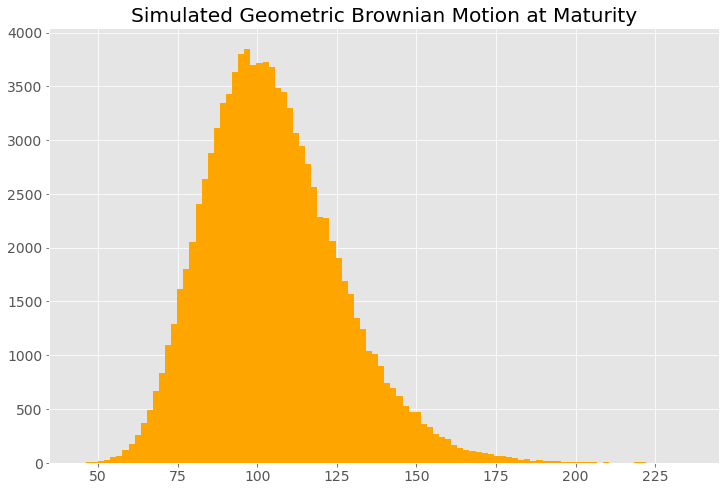

In [9]:
# plot the histogram of the simulated price path at maturity (T)
price_path.iloc[-1].hist(bins=100, color='orange')
plt.title('Simulated Geometric Brownian Motion at Maturity');

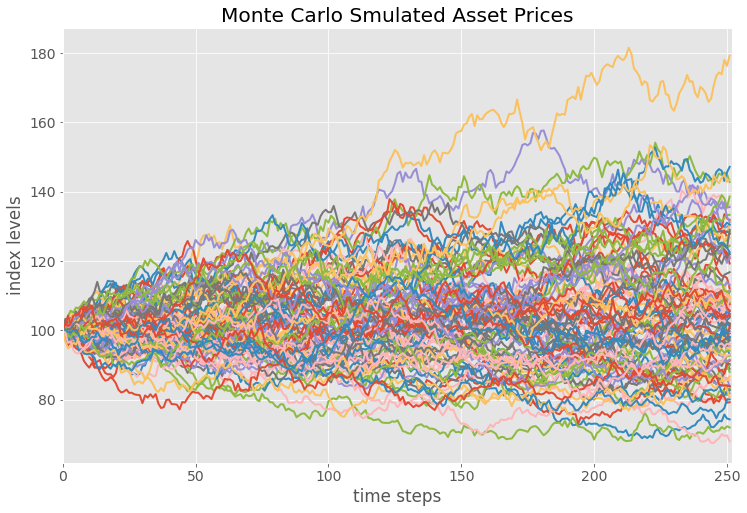

In [10]:
# visualization of simulated paths

# plot initial 100 simulated paths
plt.plot(price_path.iloc[:,:100]) # all the rows, inital 100 columns
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Smulated Asset Prices');

In [11]:
# use variance reduction techniques in psuedo random numbers to achieve desired property

# define parameters
n = 100000
w = np.random.standard_normal(100000)
w.mean(), w.std()

(-0.001009381314302856, 1.001411334375503)

In [12]:
# without anithetic variates
print(31*"-")
for i in range(1,11):
    np.random.seed(10000)
    sn = np.random.standard_normal(i**2*10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

-------------------------------
-0.007599646936  0.993952113627
 0.002172884539  0.998313345022
 0.002225583121  1.000217645410
-0.000111961560  0.998652583104
-0.002467749429  0.998560787725
-0.001323351787  0.999106892333
-0.003065752578  0.998807812778
-0.002555368674  0.998763344066
-0.001532005844  0.999146506311
-0.001364771400  0.999371817155


In [13]:
# with antithetic variates
print(31*"-")
for i in range(1,11):
    np.random.seed(10000)
    sn = np.random.standard_normal(int(i**2*10000/2))
    sna = np.concatenate((sn, -sn), axis=0)
    print("%15.12f %15.12f" % (sna.mean(), sna.std()))

-------------------------------
-0.000000000000  0.992666333135
-0.000000000000  0.996307849803
-0.000000000000  0.997410035672
-0.000000000000  1.000276630789
 0.000000000000  0.998282781298
-0.000000000000  0.998462027560
 0.000000000000  0.998205464660
 0.000000000000  0.998713653167
 0.000000000000  0.999213411064
 0.000000000000  0.998796747062


In [14]:
# European Option

# generate simulated paths for stock price
S = simulate_path(100, 0.05, 0.2, 1, 252, 100000)
# define parameters
K = 100; r = 0.05; T = 1
# caculate the discounted value of expected payoff
C0 = np.exp(-r*T) * np.mean(np.maximum(0, S[-1]-K))
P0 = np.exp(-r*T) * np.mean(np.maximum(0, K-S[-1]))
# print the values (close to formula-based values)
print(f"European Call Option Value is {C0:0.4f}")
print(f"European Put Option Value is {P0:0.4f}")

European Call Option Value is 10.3662
European Put Option Value is 5.5836


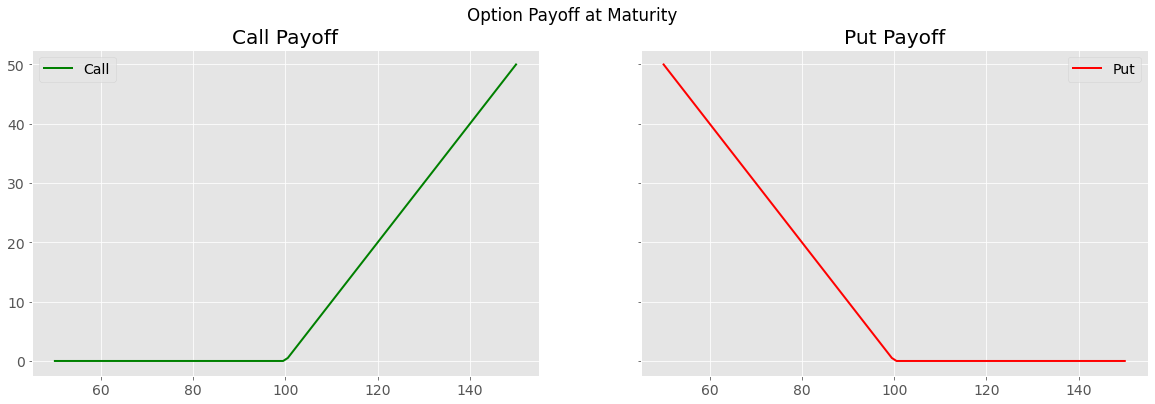

In [15]:
# Visualization of European option payoff

# range of spot prices 
sT= np.linspace(50,150,100)
# visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
title, payoff, color, label = ['Call Payoff', 'Put Payoff'], [np.maximum(sT-K, 0), np.maximum(K-sT, 0)], ['green', 'red'], ['Call', 'Put']
# plot payoff 
for i in range(2):
    axes[i].plot(sT, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()

figure.suptitle('Option Payoff at Maturity');

In [16]:
# Asian Option

# simulated paths for stock price
S = simulate_path(100, 0.05, 0.2, 1, 252, 100000)
# define parameters
K = 100; r = 0.05; T = 1
# average price of each column (i.e. over the time of each path)
A = S.mean(axis = 0)
# discounted value of expected pay off
C0 = np.exp(-r*T) * np.mean(np.maximum(0, A-K)) # for Asian Option stock average price is used instead of spot prie
P0 = np.exp(-r*T) * np.mean(np.maximum(0, K-A))
print(f"Asian Call Option Value is {C0:0.4f}")
print(f"Asian Put Option Value is {P0:0.4f}")

Asian Call Option Value is 5.7214
Asian Put Option Value is 3.3323


In [17]:
# Up-and-Out Barrier Call Option (exotic)

# simulated paths for stock price
S = simulate_path(100, 0.05, 0.2, 1, 252, 100000)
# define parameters
K = 100; B=150;
r = 0.05; sigma = 0.2; T = 1; t = 252; dt = T/t; rebate = 50; n = 100000
# barrier shift - continuity correction for discrete monitoring
B_shift = B * np.exp(0.5826 * sigma * np.sqrt(dt))
# discounted value of the expected payoff (with conituity correction)
value = 0.0
for i in range(n):
    if S[:,i].max()<B_shift:
        value += np.maximum(S[-1,i]-K, 0)
    else:
        value += rebate # if hit barrier
C0 = np.exp(-r*T) * value/n

print(f"Price of Up & Out Barrier Option is {C0: 0.4f}")

Price of Up & Out Barrier Option is  10.1820


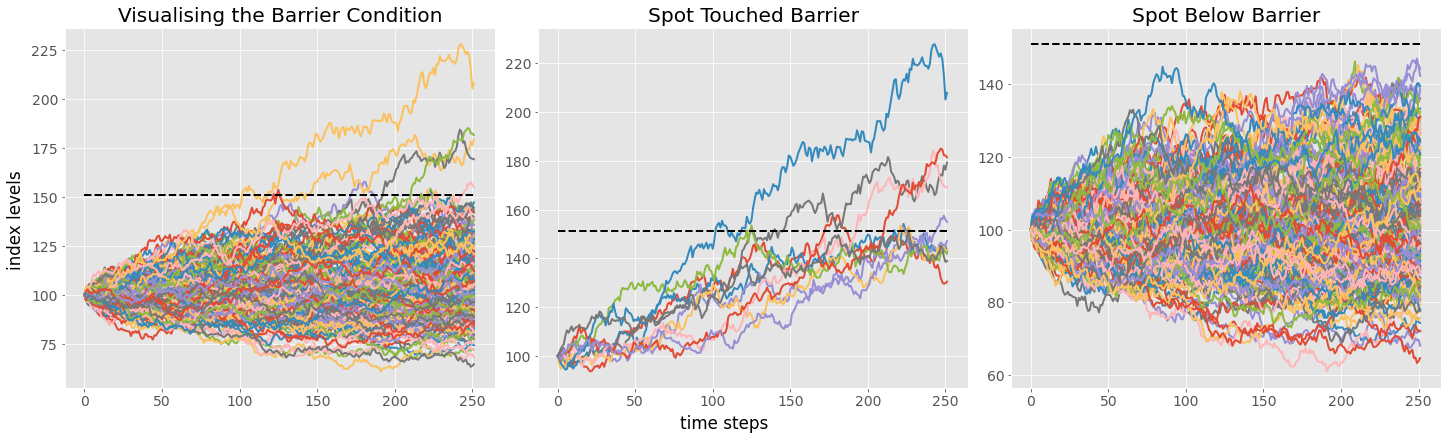

In [18]:
# visualization up&out barrier call option
figure, axes = plt.subplots(1,3, figsize=(20,6), constrained_layout=True)
title = ['Visualising the Barrier Condition', 'Spot Touched Barrier', 'Spot Below Barrier']

axes[0].plot(S[:,:200])      
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max() > B_shift else axes[2].plot(S[:,i])

for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift, 0, 252, colors='k', linestyles='dashed')

figure.supxlabel('time steps')
figure.supylabel('index levels')

plt.show()